# IMPORT LIBRARIES

In [1]:
import pandas as pd
from scipy import stats
import BiQ_Common_Fxns as BiQ
import pandas as pd
from scipy import stats
from tkinter import filedialog, Tk, simpledialog
import tkinter as tk
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate

# PLOTS STYLE

In [2]:
# Set line color
trendline_color = 'black'

# Set line width
linewidth = 1  # Replace with your desired line width (numeric value)

# Set marker design
scatter_size = 30
scatter_edgecolor = 'black'

# Set font sizes
title_fontsize = 16
label_fontsize = 14
legend_fontsize = 14
tick_label_fontsize = 12

# EXTRACT DATA AND PERFORM TEST


Chi-Squared Test Results:
Chi-Squared Statistic: 6.371929824561404
P-value: 0.17304083524635147

Contingency Table:
+--------+--------+-------+-------+
| drug   |   HIGH |   LOW |   MED |
|--------+--------+-------+-------|
| A      |      8 |     7 |     1 |
| B      |      4 |     6 |     6 |
| C      |      8 |     6 |     2 |
+--------+--------+-------+-------+

Degrees of Freedom: 4

Expected Frequencies:
[[6.66666667 6.33333333 3.        ]
 [6.66666667 6.33333333 3.        ]
 [6.66666667 6.33333333 3.        ]]


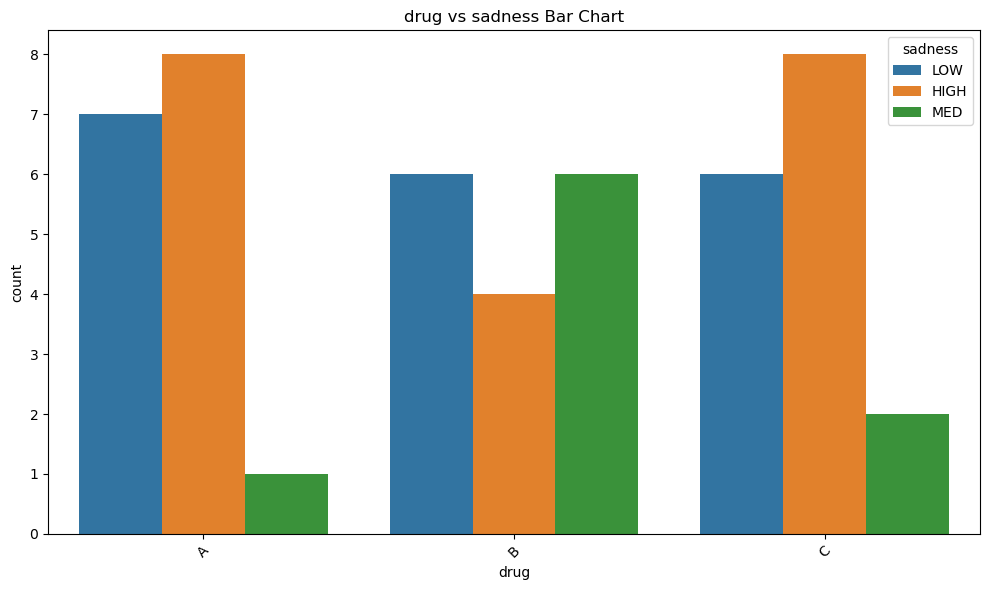

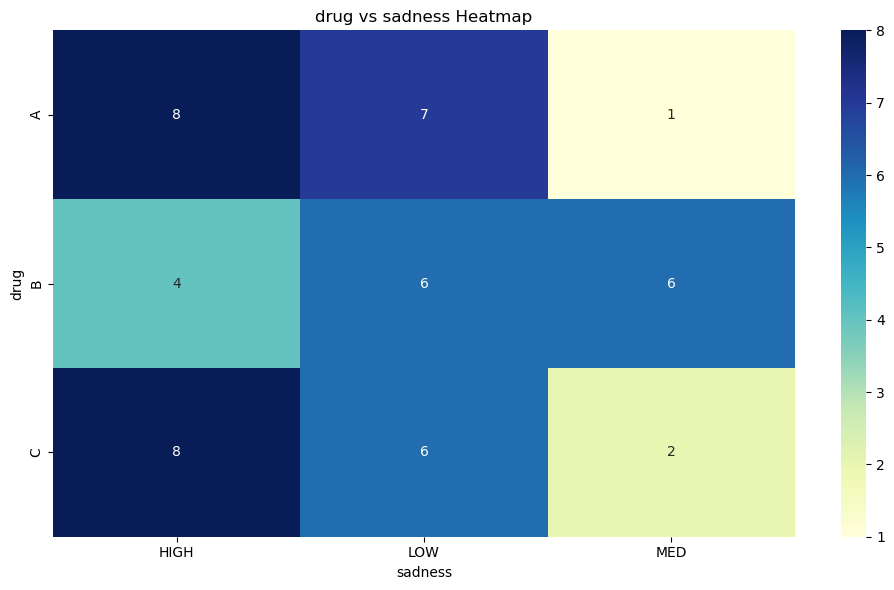

<Figure size 1000x600 with 0 Axes>

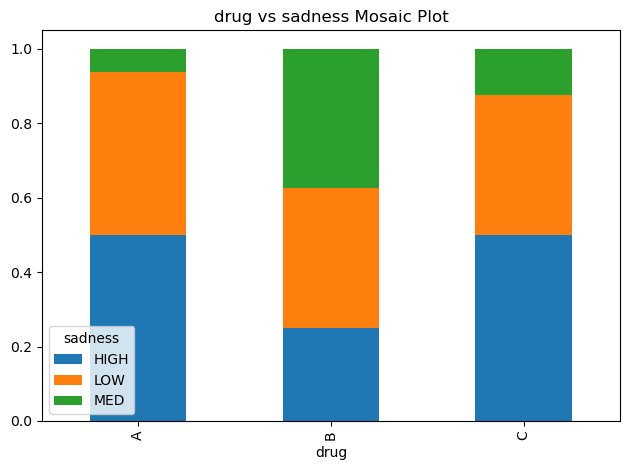


Chi-Squared Test Results:
Chi-Squared Statistic: 1.3847953216374271
P-value: 0.5003749003506719

Contingency Table:
+----------+--------+-------+-------+
| gender   |   HIGH |   LOW |   MED |
|----------+--------+-------+-------|
| Female   |     12 |     8 |     4 |
| Male     |      8 |    11 |     5 |
+----------+--------+-------+-------+

Degrees of Freedom: 2

Expected Frequencies:
[[10.   9.5  4.5]
 [10.   9.5  4.5]]


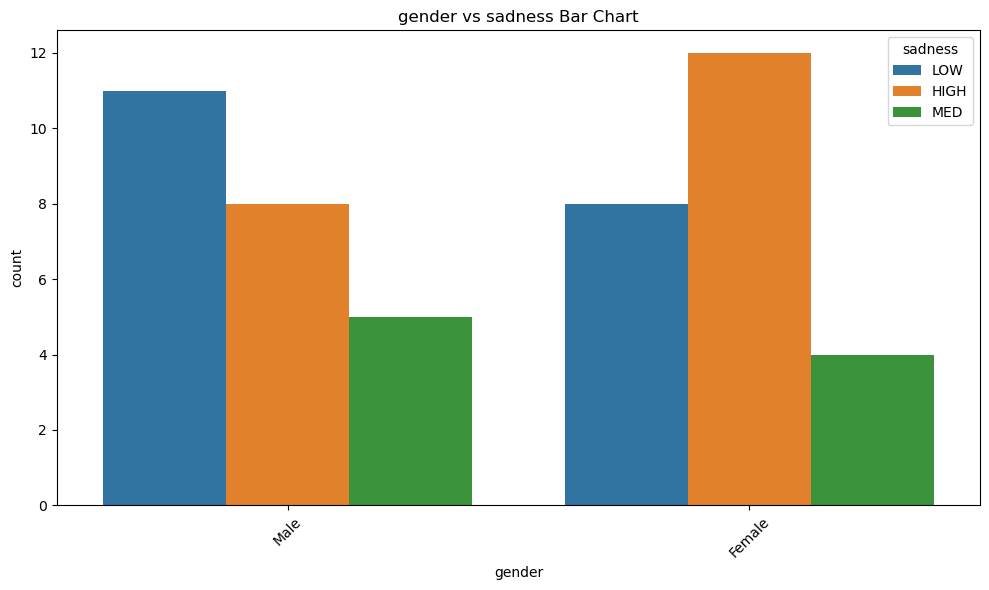

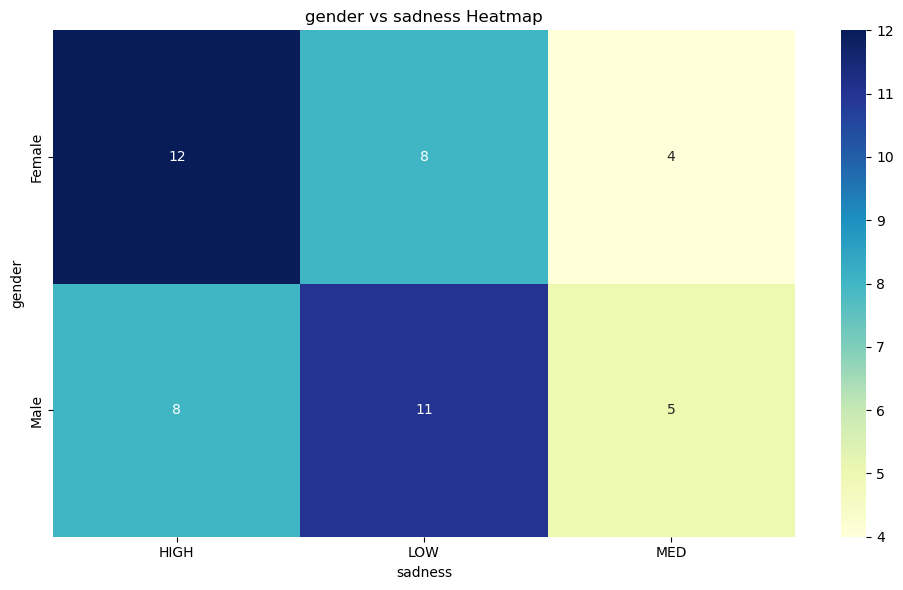

<Figure size 1000x600 with 0 Axes>

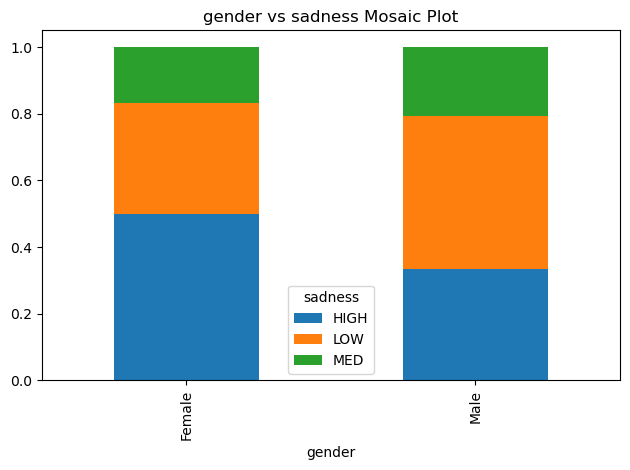

In [3]:
import tkinter as tk
from tkinter import ttk, filedialog
import pandas as pd
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

def read_excel_file(file_path):
    try:
        df = pd.read_excel(file_path)
        df = df.dropna(axis=1, how='all')
        return df
    except Exception as e:
        print(f"Error reading Excel file: {e}")
        return None

def perform_chi_squared_test(data, group_columns):
    contingency_table = pd.crosstab(index=data[group_columns[0]], columns=[data[col] for col in group_columns[1:]])
    chi2_stat, p_value, _, expected = chi2_contingency(contingency_table)
    df = (contingency_table.shape[0] - 1) * (contingency_table.shape[1] - 1)
    return chi2_stat, p_value, contingency_table, df, expected

def generate_plots(df, selected_columns):
    group1, group2 = selected_columns  # Unpack the selected columns

    # Plot Bar Chart
    plt.figure(figsize=(10, 6))
    sns.countplot(x=group1, hue=group2, data=df)
    plt.title(f'{group1} vs {group2} Bar Chart')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Plot Heatmap
    contingency_matrix = pd.crosstab(df[group1], df[group2])
    plt.figure(figsize=(10, 6))
    sns.heatmap(contingency_matrix, cmap="YlGnBu", annot=True, fmt="d")
    plt.title(f'{group1} vs {group2} Heatmap')
    plt.tight_layout()
    plt.show()

    # Plot Mosaic Plot
    mosaic_df = pd.crosstab(df[group1], df[group2], normalize='index')
    plt.figure(figsize=(10, 6))
    mosaic_df.plot(kind='bar', stacked=True)
    plt.title(f'{group1} vs {group2} Mosaic Plot')
    plt.tight_layout()
    plt.show()

def main():
    # GUI Setup
    root = tk.Tk()
    root.title("Chi-Squared Test")

    df = None
    file_label = ttk.Label(root, text="No file selected")
    file_label.pack(pady=10)

    def open_file_dialog():
        nonlocal df
        nonlocal file_label
        file_path = filedialog.askopenfilename(filetypes=[("Excel files", "*.xlsx"), ("All files", "*.*")])
        if file_path:
            df = read_excel_file(file_path)
            if df is not None:
                update_dropdowns(df)
                file_label.config(text=f"Selected File: {file_path}")
            else:
                print("Error loading data from Excel.")
                return
        else:
            print("No file selected. Please select a file first.")
            return

    def update_dropdowns(data):
        columns = data.columns.tolist()
        group1_combobox['values'] = columns
        group2_combobox['values'] = columns

    def perform_analysis():
        selected_group1 = group1_combobox.get()
        selected_group2 = group2_combobox.get()

        if not selected_group1 or not selected_group2:
            print("Please select both Group 1 and Group 2.")
            return

        chi2_stat, p_value, contingency_table, df_degrees, df_expected = perform_chi_squared_test(df, [selected_group1, selected_group2])

        # Display results
        print("\nChi-Squared Test Results:")
        print(f"Chi-Squared Statistic: {chi2_stat}")
        print(f"P-value: {p_value}")
        print("\nContingency Table:")
        print(tabulate(contingency_table, headers='keys', tablefmt='psql'))
        print(f"\nDegrees of Freedom: {df_degrees}")
        print(f"\nExpected Frequencies:\n{df_expected}")

        # Plotting
        generate_plots(df, [selected_group1, selected_group2])

    # Create GUI elements
    ttk.Button(root, text="Select Excel File", command=open_file_dialog).pack(pady=10)

    group_frame = ttk.Frame(root)
    group_frame.pack(pady=10)

    ttk.Label(group_frame, text="Group 1:").grid(row=0, column=0)
    group1_combobox = ttk.Combobox(group_frame, state="readonly")
    group1_combobox.grid(row=0, column=1)

    ttk.Label(group_frame, text="Group 2:").grid(row=1, column=0)
    group2_combobox = ttk.Combobox(group_frame, state="readonly")
    group2_combobox.grid(row=1, column=1)

    ttk.Button(root, text="Analyze", command=perform_analysis).pack(pady=10)

    root.mainloop()

if __name__ == "__main__":
    main()
